# Principal Component Analysis(PCA)

## Import the Libraries

In [1]:
# import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

## Import the Dataset `PCA.csv`

In [2]:
# import the dataset `PCA.csv`
df = pd.read_csv('PCA.csv')
df.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90


## Remove Non-Numeric features

In [3]:
# save the `Univ` feature as a separate variable and then drop it from the dataset
univ = df['Univ']
df = df.drop('Univ', axis=1)
df.head()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,1310,89,22,13,22704,94
1,1415,100,25,6,63575,81
2,1260,62,59,9,25026,72
3,1310,76,24,12,31510,88
4,1280,83,33,13,21864,90


## Statistical Summary of the Dataset

In [4]:
# describe the dataset
df.describe().round(2)

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
count,25.00,25.00,25.00,25.00,25.00,25.00
mean,1266.44,76.48,39.20,12.72,27388.00,86.72
std,108.36,19.43,19.73,4.07,14424.88,9.06
min,1005.00,28.00,14.00,6.00,8704.00,67.00
25%,1240.00,74.00,24.00,11.00,15140.00,81.00
50%,1285.00,81.00,36.00,12.00,27553.00,90.00
75%,1340.00,90.00,50.00,14.00,34870.00,94.00
max,1415.00,100.00,90.00,25.00,63575.00,97.00


## Scale the Data - Standard Scaling

In [5]:
# scale the dataset with standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df_scaled.head()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,0.410284,0.657519,-0.889867,0.070260,-0.331413,0.820303
1,1.399259,1.235212,-0.734657,-1.686251,2.560381,-0.644524
2,-0.060657,-0.760454,1.024382,-0.933460,-0.167121,-1.658634
3,0.410284,-0.025208,-0.786394,-0.180670,0.291649,0.144229
4,0.127719,0.342414,-0.320766,0.070260,-0.390846,0.369587


In [6]:
# check mean and standard deviation of the scaled dataset - should be 0 and 1 respectively
df_scaled.describe().round(2)

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
count,25.00,25.00,25.00,25.00,25.00,25.00
mean,-0.00,-0.00,-0.00,-0.00,-0.00,0.00
std,1.02,1.02,1.02,1.02,1.02,1.02
min,-2.46,-2.55,-1.30,-1.69,-1.32,-2.22
25%,-0.25,-0.13,-0.79,-0.43,-0.87,-0.64
50%,0.17,0.24,-0.17,-0.18,0.01,0.37
75%,0.69,0.71,0.56,0.32,0.53,0.82
max,1.40,1.24,2.63,3.08,2.56,1.16


## Implementing PCA

In [7]:
df_scaled.shape

(25, 6)

In [8]:
# implement full PCA
from sklearn.decomposition import PCA
pca = PCA()
df_pca = pca.fit_transform(df_scaled)

In [10]:
# check the shape of the pca tranformed dataset - should be same as the scaled dataset
df_pca.shape

(25, 6)

In [12]:
df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'])
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6
0,-1.009874,-1.064310,0.081066,0.056951,-0.128754,-0.034650
1,-2.822238,2.259045,0.836829,0.143845,-0.125962,-0.180703
2,1.112466,1.631209,-0.266787,1.075075,-0.191814,0.345679
3,-0.741741,-0.042187,0.060501,-0.157208,-0.577611,0.109163
4,-0.311912,-0.635244,0.010241,0.171364,0.012726,-0.016921


In [13]:
# eigen values
evalues = pca.explained_variance_
evalues

array([4.80425527, 0.81960016, 0.29850193, 0.17060428, 0.12948562,
       0.02755274])

In [14]:
# eigen vectors
evectors = pca.components_
evectors

array([[-0.45774863, -0.42714437,  0.42430805,  0.39064831, -0.36252316,
        -0.37940403],
       [ 0.03968044, -0.19993153,  0.32089297, -0.43256441,  0.6344864 ,
        -0.51555367],
       [ 0.1870388 ,  0.49780855, -0.15627899,  0.60608085,  0.20474114,
        -0.53247261],
       [ 0.13124033,  0.37489567,  0.0612872 , -0.50739095, -0.62340055,
        -0.43863341],
       [ 0.02064583,  0.4820162 ,  0.8010936 ,  0.07682369,  0.07254775,
         0.33810965],
       [ 0.8580547 , -0.39607492,  0.21693361,  0.1720479 , -0.17376309,
        -0.00353754]])

## Dimensionality Reduction - Optimal Number of Principal Components

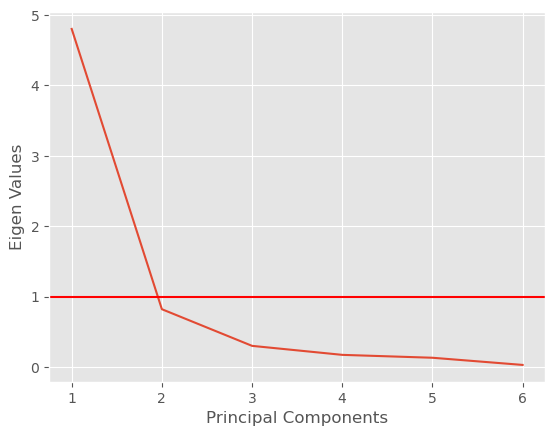

In [16]:
# deciding the optimal number of components - scree plot of eigen values with cut off at 1
plt.plot(range(1,7),evalues)
plt.axhline(y=1, color='r', linestyle='-')
plt.xlabel('Principal Components')
plt.ylabel('Eigen Values');

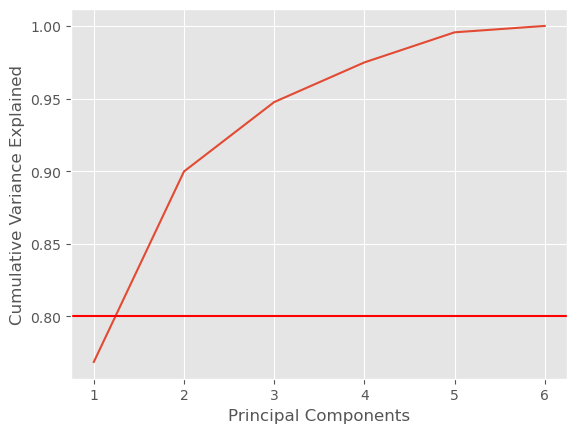

In [19]:
# deciding the optimal number of components - cumulative variance explained plot
explained_var_ratio = pca.explained_variance_ratio_
explained_var_ratio
cum_exp_var = np.cumsum(explained_var_ratio)
cum_exp_var
plt.plot(range(1,7),cum_exp_var)
# add a horizontal line at 0.8
plt.axhline(y=0.8, color='r', linestyle='-')
plt.xlabel('Principal Components')
plt.ylabel('Cumulative Variance Explained');

## Repeat PCA to get the transformed data with optimal number of components

In [20]:
# with the identified optimal number of component of 2, implement PCA again & get reduced dimensionas dataset
pca_2 = PCA(n_components=2)
df_pca_2 = pca_2.fit_transform(df_scaled)
df_pca_2 = pd.DataFrame(df_pca_2, columns=['PC1', 'PC2'])
df_pca_2.head()

,PC1,PC2
0,-1.009874,-1.064310
1,-2.822238,2.259045
2,1.112466,1.631209
3,-0.741741,-0.042187
4,-0.311912,-0.635244


In [21]:
# add back the `Univ` feature to the reduced dimension dataset, add column names
df_pca_2['Univ'] = univ
df_pca_2.columns = ['PC1', 'PC2', 'Univ']
df_pca_2.head()

,PC1,PC2,Univ
0,-1.009874,-1.064310,Brown
1,-2.822238,2.259045,CalTech
2,1.112466,1.631209,CMU
3,-0.741741,-0.042187,Columbia
4,-0.311912,-0.635244,Cornell
